# Sentiment Analysis on British-Airways reviews

---

Sentiment analysis is the process of understanding the opinion of an author about a
subject

## Web scraping and analysis

### Scraping data from Skytrax
link: [https://www.airlinequality.com/airline-reviews/british-airways] 

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [5]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2


KeyboardInterrupt: ignored

In [ ]:
print(reviews)

In [ ]:
BA_review = pd.DataFrame()
BA_review["reviews"] = reviews
BA_review.head()

In [ ]:
d = '✅ Trip Verified | '
e = 'Not Verified | '
f = '✅ Trip Verified |  '
g = '❎ '

df_list = []
for review in BA_review['reviews']:
  review = review.replace(d,"")
  review = review.replace(e,"")
  review = review.replace(f,"")
  review = review.replace(g,"")
  df_list.append(review)


df = pd.DataFrame()
df['reviews']= df_list
df.head()

In [ ]:
print(df_list)

## Data Cleaning:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/Colab Notebooks/british_air_dataViz/ba_review.csv'
df=pd.read_csv(path)
df.head()

,text,score
0,✅ Trip Verified | Mumbai to Edinburgh via Lon...,8
1,✅ Trip Verified | Mumbai to London Heathrow. ...,6
2,✅ Trip Verified | Delhi to London. Having rea...,7
3,✅ Trip Verified | When you travel British Airw...,4
4,✅ Trip Verified | British Airways gets plenty...,10


In [4]:
print(df.text.tolist())

["✅ Trip Verified |  Mumbai to Edinburgh via London. I'm quite surprised to read the varied reviews as I have always had a great experience with BA in terms of in-flight service and airport handling. After sales service can be a different experience! This flight I arrived a little late at the airport due to transport issues, hot and sweaty and the check-in girl was such a blessing. She calmed me down, reassured me and helped me get through security swiftly. I was able to secure a very cheap last-minute upgrade to Premium Economy and I am so glad I did. The service was wonderful, we were looked after very well, lots of water offered throughout the flight. I thought the seat was tremendously spacious and comfortable, even for the regular upgrade price, 2 rather than 3 seats to the side and 3 rather than 4 in the centre, gives you a lot more space. The food was ok, I've had worse, I've had better. But I was comfortable, a good temperature and had a great choice of films. My connecting pla

In [5]:
def opinion(score):
  if(score>=6 and score<=10):
    return 2
  if(score<4 and score >=0):
    return 0
  else:
    return 1

for i in range(len(df)):
  df.score[i]=opinion(df.score[i])

df.head()

<ipython-input-5-ad124dbf5f82>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.score[i]=opinion(df.score[i])


,text,score
0,✅ Trip Verified | Mumbai to Edinburgh via Lon...,2
1,✅ Trip Verified | Mumbai to London Heathrow. ...,2
2,✅ Trip Verified | Delhi to London. Having rea...,2
3,✅ Trip Verified | When you travel British Airw...,1
4,✅ Trip Verified | British Airways gets plenty...,2


In [6]:
d = '✅ Trip Verified | '
e = 'Not Verified | '
f = '✅ Trip Verified |  '
g = '❎ '

df_list = []
for review in df['text']:
  review = review.replace(d,"")
  review = review.replace(e,"")
  review = review.replace(f,"")
  review = review.replace(g,"")
  df_list.append(review)


df_cleaned = pd.DataFrame()
df_cleaned['text']= df_list
df_cleaned['score']= df.score

df_cleaned.head()

,text,score
0,Mumbai to Edinburgh via London. I'm quite sur...,2
1,Mumbai to London Heathrow. Disappointing expe...,2
2,Delhi to London. Having read many negative re...,2
3,When you travel British Airways its like you a...,1
4,British Airways gets plenty of well deserved ...,2


In [7]:
df_cleaned.replace(["a-zA-Z"]," ",regex=True,inplace=True)
df_cleaned.head()

,text,score
0,Mumbai to Edinburgh via London. I'm quite sur...,2
1,Mumbai to London Heathrow. Disappointing expe...,2
2,Delhi to London. Having read many negative re...,2
3,When you travel British Airways its like you a...,1
4,British Airways gets plenty of well deserved ...,2


In [8]:
df_cleaned.to_csv("/content/drive/MyDrive/Colab Notebooks/british_air_dataViz/BA_reviews_cleaned.csv")


##Text Pre-processing:
In this section the review text will be processed to remove unwanted stop-words/numbers/puntuations etc.


The text will be then lemmatized to their root words and will be made ready for sentiment analysis

In [9]:
# importing nltk library needed for NLP 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [10]:
# Making the review text to lower-case.
for i in range(len(df_cleaned)):
  df_cleaned.text[i]=df_cleaned.text[i].lower()

df_cleaned.head()


<ipython-input-10-8a428bce758d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.text[i]=df_cleaned.text[i].lower()


,text,score
0,mumbai to edinburgh via london. i'm quite sur...,2
1,mumbai to london heathrow. disappointing expe...,2
2,delhi to london. having read many negative re...,2
3,when you travel british airways its like you a...,1
4,british airways gets plenty of well deserved ...,2


In [11]:
# Tokenization of texts into words
from nltk import word_tokenize as wt

word_tokens=[wt(review) for review in df_cleaned.text]    #word_tokens is a list(reviews) of list(review) of strings(text)
print(word_tokens)

[['mumbai', 'to', 'edinburgh', 'via', 'london', '.', 'i', "'m", 'quite', 'surprised', 'to', 'read', 'the', 'varied', 'reviews', 'as', 'i', 'have', 'always', 'had', 'a', 'great', 'experience', 'with', 'ba', 'in', 'terms', 'of', 'in-flight', 'service', 'and', 'airport', 'handling', '.', 'after', 'sales', 'service', 'can', 'be', 'a', 'different', 'experience', '!', 'this', 'flight', 'i', 'arrived', 'a', 'little', 'late', 'at', 'the', 'airport', 'due', 'to', 'transport', 'issues', ',', 'hot', 'and', 'sweaty', 'and', 'the', 'check-in', 'girl', 'was', 'such', 'a', 'blessing', '.', 'she', 'calmed', 'me', 'down', ',', 'reassured', 'me', 'and', 'helped', 'me', 'get', 'through', 'security', 'swiftly', '.', 'i', 'was', 'able', 'to', 'secure', 'a', 'very', 'cheap', 'last-minute', 'upgrade', 'to', 'premium', 'economy', 'and', 'i', 'am', 'so', 'glad', 'i', 'did', '.', 'the', 'service', 'was', 'wonderful', ',', 'we', 'were', 'looked', 'after', 'very', 'well', ',', 'lots', 'of', 'water', 'offered', 't

In [12]:
# Cleaning the tokens and removing numbers and puntuations.
cleaned_tokens=[[word for word in item if word.isalpha()] for item in word_tokens]
print(cleaned_tokens[0])

['mumbai', 'to', 'edinburgh', 'via', 'london', 'i', 'quite', 'surprised', 'to', 'read', 'the', 'varied', 'reviews', 'as', 'i', 'have', 'always', 'had', 'a', 'great', 'experience', 'with', 'ba', 'in', 'terms', 'of', 'service', 'and', 'airport', 'handling', 'after', 'sales', 'service', 'can', 'be', 'a', 'different', 'experience', 'this', 'flight', 'i', 'arrived', 'a', 'little', 'late', 'at', 'the', 'airport', 'due', 'to', 'transport', 'issues', 'hot', 'and', 'sweaty', 'and', 'the', 'girl', 'was', 'such', 'a', 'blessing', 'she', 'calmed', 'me', 'down', 'reassured', 'me', 'and', 'helped', 'me', 'get', 'through', 'security', 'swiftly', 'i', 'was', 'able', 'to', 'secure', 'a', 'very', 'cheap', 'upgrade', 'to', 'premium', 'economy', 'and', 'i', 'am', 'so', 'glad', 'i', 'did', 'the', 'service', 'was', 'wonderful', 'we', 'were', 'looked', 'after', 'very', 'well', 'lots', 'of', 'water', 'offered', 'throughout', 'the', 'flight', 'i', 'thought', 'the', 'seat', 'was', 'tremendously', 'spacious', 'a

In [ ]:
# Stemming the word tokens to its root word
from nltk.stem import PorterStemmer
      # for removing the stopwords from the tokens...
porter=PorterStemmer()

stemmed_tokens = [[porter.stem(word) for word in text if word not in set(stopwords.words('english'))] for text in cleaned_tokens]
print(stemmed_tokens[0])

In [13]:
from nltk.corpus import stopwords 
stopword=nltk.corpus.stopwords.words('english')
new_words=["ba","plane","flight","told"]
stopword.extend(new_words)

In [14]:
# Lemmatization of word tokens to its meaningful root word 
from nltk.stem import WordNetLemmatizer 
lemmatizer= WordNetLemmatizer()

lemmatized_tokens=[[lemmatizer.lemmatize(word) for word in text if word not in set(stopword)] for text in cleaned_tokens]
print(lemmatized_tokens[0])

['mumbai', 'edinburgh', 'via', 'london', 'quite', 'surprised', 'read', 'varied', 'review', 'always', 'great', 'experience', 'term', 'service', 'airport', 'handling', 'sale', 'service', 'different', 'experience', 'arrived', 'little', 'late', 'airport', 'due', 'transport', 'issue', 'hot', 'sweaty', 'girl', 'blessing', 'calmed', 'reassured', 'helped', 'get', 'security', 'swiftly', 'able', 'secure', 'cheap', 'upgrade', 'premium', 'economy', 'glad', 'service', 'wonderful', 'looked', 'well', 'lot', 'water', 'offered', 'throughout', 'thought', 'seat', 'tremendously', 'spacious', 'comfortable', 'even', 'regular', 'upgrade', 'price', 'rather', 'seat', 'side', 'rather', 'centre', 'give', 'lot', 'space', 'food', 'ok', 'worse', 'better', 'comfortable', 'good', 'temperature', 'great', 'choice', 'film', 'connecting', 'late', 'leaving', 'heathrow', 'edinburgh', 'due', 'bad', 'weather', 'handled', 'nicely', 'glad', 'flew', 'trip']


In [15]:
# Combining the cleaned lemmatized tokens back to form a single sentence for making a Bag-Of-Words
df_copy=df_cleaned.copy()
for i in range(len(df)):
  df_copy.text[i] = ' '.join(lemmatized_tokens[i])

df_copy.head(10)

<ipython-input-15-96937b02c74b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.text[i] = ' '.join(lemmatized_tokens[i])


,text,score
0,mumbai edinburgh via london quite surprised re...,2
1,mumbai london heathrow disappointing experienc...,2
2,delhi london read many negative review british...,2
3,travel british airway like lucky able british ...,1
4,british airway get plenty well deserved kickin...,2
5,first class even starting lounge may offshoot ...,0
6,linate london morning departure received email...,0
7,flew british airway jk london heathrow connect...,0
8,flown british airway numerous time many year s...,0
9,fault new world food service outbound inbound ...,2


In [16]:
# Splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split

x = df_copy.text
y = df_copy.score

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state= 42)

In [17]:
print(df_copy.text[5])


first class even starting lounge may offshoot fine concorde room need feel like rural train station poor food average drink indifferent staff compare lh facility fra muc ground assistance boarding haphazard fine cornish champagne offered happily quaffed seat ok class new ac j class pod close emirate suite small thing like menu presentation boarding sufficient food lot seat f seat comfort ok nothing special toilet small curiously offering paper crew friendly service decent delivery poor overall relentless drive bottom catching first class product worth name anymore one assume trying phase drive paying passenger airline place serious effort deliver superb premium product


In [18]:
df_copy.text[440]  #verifying data

'problem airport vienna easy find british airway check desk time cabin crew kind pleasant also ordered tomato mozzarella flatbread delicious problem heathrow gate bridge malfunction wait hour aircraft airliner mistake enjoyed british airway'

In [19]:
df_copy.score[440]  #verifying data

2

In [20]:
y_train.head()

541    0
440    2
482    0
422    2
778    0
Name: score, dtype: int64

### making bag-of-words from the corpus

In [109]:
# Transforming the texts into vector format for the machine learning models to consume.
# Making Bag-Of-Words from the lemmatized_tokens for better feature selection

from sklearn.feature_extraction.text import CountVectorizer as cv
vect=cv(max_features=10000, #parameters
        ngram_range=(2,2) #binary BOW takes two words at a time make a corpus
        )
vect.fit(x)
total_bow = vect.transform(x) #BOW of the whole dataset text documents
vect.fit(x_train)
train_bow = vect.transform(x_train)
vect.fit(x_test)
test_bow = vect.transform(x_test)
print(train_bow.toarray())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
print(vect.get_feature_names())

['able check', 'abu dhabi', 'access aisle', 'actually quite', 'afternoon tea', 'ahead schedule', 'aircraft clean', 'airline day', 'airline still', 'airport could', 'airport hour', 'airport staff', 'airway customer', 'airway need', 'aisle seat', 'american airline', 'amsterdam london', 'amsterdam via', 'angeles london', 'announcement made', 'another airline', 'another number', 'another passenger', 'anything go', 'arm rest', 'armrest seat', 'around hour', 'around passenger', 'arrival gate', 'arrival time', 'arrived ahead', 'arrived boarding', 'arrived day', 'arrived early', 'arrived london', 'arrived minute', 'arrived time', 'article ec', 'ask refund', 'ask water', 'asked attendant', 'attendant said', 'attentive professional', 'attentive service', 'avios point', 'avoid future', 'award ticket', 'back denmark', 'back heathrow', 'back home', 'back london', 'back netherlands', 'back screen', 'back seat', 'bacon roll', 'bad experience', 'bag allowance', 'bag checked', 'bag crisp', 'bag day', '

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### making TF/IDF from the corpus

In [21]:
x=list(df_copy.text)
print(x)

['mumbai edinburgh via london quite surprised read varied review always great experience term service airport handling sale service different experience arrived little late airport due transport issue hot sweaty girl blessing calmed reassured helped get security swiftly able secure cheap upgrade premium economy glad service wonderful looked well lot water offered throughout thought seat tremendously spacious comfortable even regular upgrade price rather seat side rather centre give lot space food ok worse better comfortable good temperature great choice film connecting late leaving heathrow edinburgh due bad weather handled nicely glad flew trip', 'mumbai london heathrow disappointing experience would book business class felt like bad value money flown economy premium economy found economy basic seat uncomfortable enjoyed premium economy quieter cabin space expected big step business class really apart choice food better seat larger entertainment screen really see upgrade comparison hu

In [22]:
### making TF/IDF vector 
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf 
tfidf_vect = tfidf(max_features = 1000,ngram_range = (1,3), max_df=0.75  #max_df means the word must be present in 75% of the documents in the corpus
                   ,min_df=50 #min_df means the word should be present in atleast 50 documents in the corpus
                   ,stop_words='english')
#tfidf_vect.fit(x)
total_tfidf = tfidf_vect.fit_transform(x)


In [23]:
x = total_tfidf
y = df_copy.score

train_tfidf, test_tfidf,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state= 42)

## Making Word Cloud:
Word cloud represents the most frequent word that the customer used in the comments.

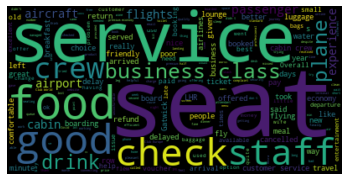

In [9]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud as wc
import matplotlib.pyplot as plt

stopword=set(ENGLISH_STOP_WORDS)
stopword.update(["Trip Verified","flight","BA","one","hour","day","time",
                 "will","u","told","back","us","Verified","Trip"
                 ,"still","even","gate","asked","British","Airway",
                 "hours","London","Heathrow","Airways","airline","did","just","bag","got","make","ba"])


my_cloud = wc(background_color='black',stopwords=stopword).generate(str(df_cleaned.text.tolist()))

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

## Modelling
designing a machine learning model and fitting its parameters to training data

### Using Logistic Regression model:




In [ ]:
abcd

### Using Random Forest Classifier Model:

In [24]:
# Importing and making a random forest classfier
from sklearn.ensemble import RandomForestClassifier 
random_classifier = RandomForestClassifier(n_estimators=100,criterion='entropy',)
random_classifier.fit(train_tfidf,y_train)

RandomForestClassifier(criterion='entropy')

In [25]:
# Testing the classifier with test dataset:
predictions = random_classifier.predict(test_tfidf)

In [26]:
# checking accuracy score:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

matrix = confusion_matrix(y_test,predictions)/len(y_test)
print(matrix)
score = accuracy_score(y_test,predictions)
print(score)
report = classification_report(y_test,predictions)
print(report)


[[0.46666667 0.         0.04      ]
 [0.07666667 0.         0.04      ]
 [0.07333333 0.         0.30333333]]
0.77
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       152
           1       0.00      0.00      0.00        35
           2       0.79      0.81      0.80       113

    accuracy                           0.77       300
   macro avg       0.52      0.58      0.54       300
weighted avg       0.68      0.77      0.72       300



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
## testing the model performance using a custom text

document = ["the flying experience with ba was very good in the business class,they had very nice service in the business class,the food choice is also good in business class as compared to the economy and others,the wine served in the business class is too perfect it just blends in with the ambience and the royalty of the plane",]
wordstoken=[wt(text) for text in document]
cleantokens=[[word for word in text if word.isalpha()] for text in wordstoken]
l1=[[lemmatizer.lemmatize(word) for word in text] for text in cleantokens]
a=[]
for i in range(len(document)):
  document[i]=' '.join(l1[i])

# # 
vector = tfidf_vect.transform(document)
predictions = random_classifier.predict(vector)


print(wordstoken)
print(cleantokens)
print(l1)
print(document)
print(predictions)


[['the', 'flying', 'experience', 'with', 'ba', 'was', 'very', 'good', 'in', 'the', 'business', 'class', ',', 'they', 'had', 'very', 'nice', 'service', 'in', 'the', 'business', 'class', ',', 'the', 'food', 'choice', 'is', 'also', 'good', 'in', 'business', 'class', 'as', 'compared', 'to', 'the', 'economy', 'and', 'others', ',', 'the', 'wine', 'served', 'in', 'the', 'business', 'class', 'is', 'too', 'perfect', 'it', 'just', 'blends', 'in', 'with', 'the', 'ambience', 'and', 'the', 'royalty', 'of', 'the', 'plane']]
[['the', 'flying', 'experience', 'with', 'ba', 'was', 'very', 'good', 'in', 'the', 'business', 'class', 'they', 'had', 'very', 'nice', 'service', 'in', 'the', 'business', 'class', 'the', 'food', 'choice', 'is', 'also', 'good', 'in', 'business', 'class', 'as', 'compared', 'to', 'the', 'economy', 'and', 'others', 'the', 'wine', 'served', 'in', 'the', 'business', 'class', 'is', 'too', 'perfect', 'it', 'just', 'blends', 'in', 'with', 'the', 'ambience', 'and', 'the', 'royalty', 'of', 

### Topic Modelling of the review texts:
The idea here is to segregate the topics that are being mostly talked about the customers in their reviews.

In [31]:
# importing decomposition module from sklearn to breakdown the review text and figure out the topic the review is for
from sklearn import decomposition
lda = decomposition.LatentDirichletAllocation(n_components=5,max_iter=20,learning_method='online',learning_offset=100,n_jobs=1,random_state=11)

In [33]:
w1=lda.fit_transform(total_tfidf)
h1=lda.components_

In [34]:
w1[0]

array([0.03069918, 0.03157837, 0.03069897, 0.03069867, 0.8763248 ])

In [38]:
import numpy as np

num_words = 15
vocab = np.array(vect.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in h1])
topics = [' '.join(t) for t in topic_words]

topics

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['business seat call button person front class lounge choose seat london british british airway food offering month advance flew british row seat economy cabin food ok could see delay due',
 'everything went immediately behind long time good wine would recommend british airway call button favourite airline seat close service british row seat travel companion looking forward well managed think unacceptable',
 'good service charm food lounge access check business qatar airway boarding people could speak seat without london gatwick good overall back london movie selection economy class friendly service outbound journey',
 'bread roll madrid london seat tiny hour wait business seat food offering london british call button coffee tea took almost singapore london queue bag long time exit row film choice',
 'british airway crew attentive business seat travel companion london british number given number called experience ever flew british choice ife care customer boarding well ask refund crew 

In [58]:
topics_list=['Business_class','food&comfort','hospitality','boarding','customer_care']

In [59]:
# prominent_topic = max(w1[1])
# topic = np.where(w1[1]==prominent_topic)[0]

# print(w1)
# print(topic)
topic=[]
for i in range(len(df_copy)):
  prominent_topic = max(w1[i])
  topic.append(str(np.where(w1[i]==prominent_topic)[0]))

In [87]:
df_copy['topic']=topic
a=[]
b=[]
for i in range(len(df_copy)):
  a.append(topics_list[int(df_copy.topic[i][1])])
  df_copy.topic[i]=int(df_copy.topic[i][1])+1
  if(df_copy.score[i] == 0): 
    b.append('Negative')
  if(df_copy.score[i] == 1): 
    b.append('Neutral')
  if(df_copy.score[i] == 2): b.append('Positive')

df_copy['topics_name'] = a
df_copy['sentiment'] = b
df_copy.head()

<ipython-input-87-6bcd5e42f045>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.topic[i]=int(df_copy.topic[i][1])+1


,text,score,topic,topics_name,sentiment
0,mumbai edinburgh via london quite surprised re...,2,1,Business_class,Positive
1,mumbai london heathrow disappointing experienc...,2,1,Business_class,Positive
2,delhi london read many negative review british...,2,3,hospitality,Positive
3,travel british airway like lucky able british ...,1,5,customer_care,Neutral
4,british airway get plenty well deserved kickin...,2,1,Business_class,Positive


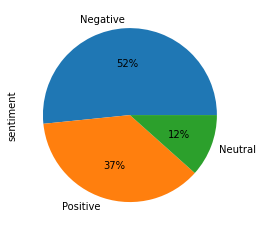

In [91]:
df_copy.sentiment.value_counts().plot(kind='pie',autopct='%1.0f%%')

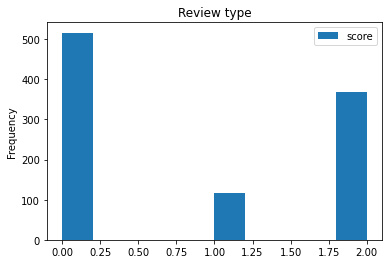

In [83]:
df_copy.score.plot(kind='hist',title='Review type',legend=['pos'])

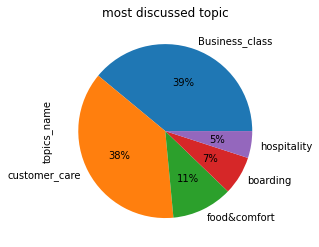

In [67]:
df_copy.topics_name.value_counts().plot(kind='pie',autopct='%1.0f%%',title='most discussed topic')

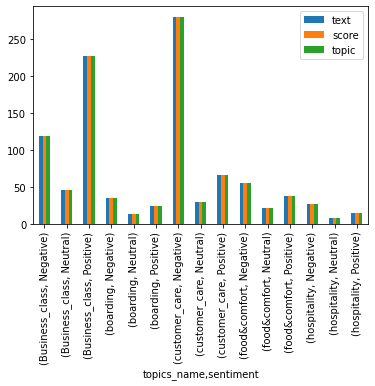

In [96]:
topic_count=df_copy.groupby(['topics_name','sentiment']).count()
topic_count.plot(kind='bar')

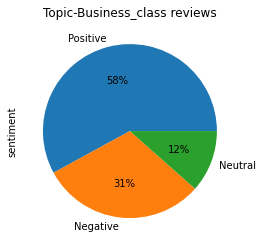

In [103]:
df1=df_copy[df_copy.topics_name == 'Business_class']
df1.sentiment.value_counts().plot(kind='pie',title='Topic-Business_class reviews',autopct='%1.0f%%')

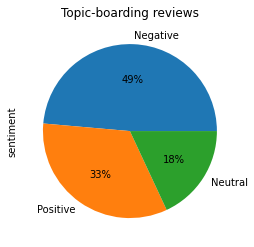

In [104]:
df1=df_copy[df_copy.topics_name == 'boarding']
df1.sentiment.value_counts().plot(kind='pie',title='Topic-boarding reviews',autopct='%1.0f%%')

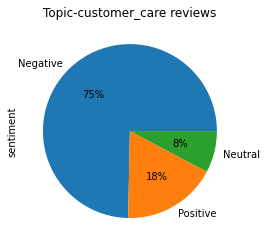

In [105]:
df1=df_copy[df_copy.topics_name == 'customer_care']
df1.sentiment.value_counts().plot(kind='pie',title='Topic-customer_care reviews',autopct='%1.0f%%')

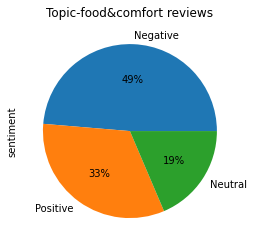

In [106]:
df1=df_copy[df_copy.topics_name == 'food&comfort']
df1.sentiment.value_counts().plot(kind='pie',title='Topic-food&comfort reviews',autopct='%1.0f%%')

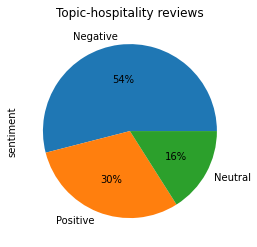

In [107]:
df1=df_copy[df_copy.topics_name == 'hospitality']
df1.sentiment.value_counts().plot(kind='pie',title='Topic-hospitality reviews',autopct='%1.0f%%')

In [37]:
### testing the topic classifier with custom text that is converted to its vector format.

w2=lda.fit_transform(vector)
w2

array([[0.05083993, 0.79658494, 0.05074305, 0.05090527, 0.05092681]])

### making a plority

In [ ]:
df_temp=df
df_temp.head()

,review
0,✅ Trip Verified | I was flying to Warsaw for ...
1,✅ Trip Verified | Booked a BA holiday to Marr...
2,✅ Trip Verified | Extremely sub-par service. H...
3,✅ Trip Verified | I virtually gave up on Brit...
4,✅ Trip Verified | I was pleasantly surprised ...


In [ ]:
review_str=str(review2)
type(review2)

print(str(review2))

['✅ Trip Verified |  I was flying to Warsaw for one day of meetings and would be flying back out to Miami the next day. Initially my flight was delayed in Denver by 3 hours. As such I knew I would miss my connection in Warsaw. The Denver to Heathrow flight was terrible. The plane was dirty, I was in economy, I usually fly business or Premium Economy but on this flight there was no availability. The plane was only about 2/3 full and the service was not good. My food was inedible and the seats very cramped although the middle seat was open so that made it tolerable. When i arrived in Heathrow it was a complete circus. Passengers everywhere trying to rebook missed connections. Not only my flight but multiple other flights had missed connections. After waiting in line for an hour I was finally rebooked on another BA flight to Warsaw. This plane was the smallest 3x3 plane I have seen. Packed in like sardines. My bag never showed up so i had to cancel my meeting and now have no bag to fly ba

In [ ]:
from textblob import TextBlob
my_valence = TextBlob(text)
df_temp['polarity']=my_valence.sentiment.polarity
df_temp['subjectivity']=my_valence.sentiment.subjectivity


df_temp.polarity[1]


-0.010500000000000002